## Air Pressure System Failure Prediction

Given *data about air pressure systems in trucks*, let's try to predict whether a given system will **fail** or not. 

We will use a logistic regression model to make our predictions.
We will reduce the dimensionality of the data using principal component analysis.

Data source: https://www.kaggle.com/datasets/uciml/aps-failure-at-scania-trucks-data-set?select=aps_failure_training_set_processed_8bit.csv

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression

In [2]:
train_df = pd.read_csv('aps_failure_training_set_processed_8bit.csv')
test_df = pd.read_csv('aps_failure_test_set_processed_8bit.csv')

In [3]:
train_labels = pd.read_csv('aps_failure_training_set.csv')['class']
test_labels = pd.read_csv('aps_failure_test_set.csv')['class']

In [4]:
train_df['class'] = train_labels
test_df['class'] = test_labels

In [5]:
train_df

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,0.117188,-0.289062,0.992188,-0.007812,-0.046875,-0.054688,-0.007812,-0.03125,-0.054688,-0.117188,-0.171875,0.101562,0.515625,0.359375,-0.046875,-0.031250,0.171875,-0.054688,-0.023438,-0.023438,-0.109375,-0.109375,0.187500,0.093750,0.242188,0.539062,-0.101562,-0.007812,-0.039062,-0.015625,-0.023438,-0.078125,-0.03125,-0.015625,-0.023438,-0.03125,-0.031250,0.257812,0.960938,-0.164062,-0.070312,-0.015625,-0.031250,-0.070312,-0.039062,-0.117188,-0.203125,0.523438,-0.109375,-0.062500,-0.046875,-0.015625,0.242188,0.054688,0.000000,0.015625,0.195312,0.968750,0.992188,-0.343750,-0.148438,-0.109375,0.195312,-0.156250,-0.195312,-0.148438,-0.054688,0.171875,0.257812,0.304688,0.156250,-0.242188,-0.210938,-0.281250,-0.250000,-0.281250,-0.812500,-0.796875,-0.796875,0.992188,0.117188,0.195312,0.195312,0.234375,0.398438,-0.070312,0.398438,0.625000,0.242188,0.0,0.992188,-0.007812,-0.015625,-0.015625,0.210938,-0.093750,0.093750,-0.109375,0.867188,-0.039062,-0.085938,-0.148438,-0.187500,0.007812,0.601562,0.750000,0.085938,-0.046875,-0.023438,-0.007812,-0.046875,0.195312,-0.085938,0.484375,0.148438,0.023438,0.148438,-0.007812,0.320312,0.296875,0.140625,-0.007812,-0.007812,-0.054688,-0.085938,0.437500,-0.210938,-0.046875,0.992188,-0.039062,0.000000,0.562500,0.132812,0.421875,-0.023438,-0.03125,-0.007812,-0.101562,-0.007812,-0.03125,-0.023438,-0.03125,0.289062,0.820312,0.992188,-0.054688,-0.164062,0.445312,0.554688,0.851562,0.546875,-0.203125,-0.140625,-0.023438,-0.03125,-0.187500,0.242188,0.296875,0.093750,0.359375,0.687500,0.515625,0.234375,0.070312,0.007812,-0.109375,-0.140625,-0.171875,-0.023438,-0.023438
1,neg,-0.179688,-0.289062,-0.468750,-0.007812,-0.046875,-0.054688,-0.007812,-0.03125,-0.054688,-0.117188,-0.179688,-0.140625,0.015625,0.015625,-0.015625,-0.031250,-0.101562,-0.054688,-0.023438,-0.023438,-0.109375,-0.109375,-0.117188,-0.125000,0.023438,-0.085938,-0.101562,-0.007812,-0.039062,-0.015625,-0.171875,-0.257812,-0.03125,-0.015625,-0.023438,-0.03125,-0.031250,-0.031250,-0.093750,0.085938,-0.234375,-0.015625,-0.007812,0.101562,0.054688,-0.109375,-0.109375,-0.039062,-0.093750,-0.062500,-0.046875,-0.015625,-0.007812,-0.187500,-0.179688,-0.156250,-0.125000,-0.093750,-0.070312,0.085938,0.210938,-0.093750,-0.078125,-0.132812,-0.109375,-0.117188,0.421875,-0.101562,-0.062500,0.132812,-0.062500,-0.218750,-0.203125,-0.148438,-0.835938,-0.820312,-0.812500,-0.796875,-0.796875,-0.867188,-0.179688,-0.078125,-0.078125,-0.054688,-0.078125,0.210938,0.992188,-0.992188,-0.093750,0.0,-0.445312,-0.007812,-0.132812,-0.015625,-0.140625,-0.093750,-0.031250,-0.109375,-0.218750,-0.039062,-0.085938,-0.148438,-0.195312,-0.031250,-0.015625,-0.054688,-0.070312,-0.078125,-0.031250,-0.007812,-0.078125,-0.078125,0.062500,0.070312,0.000000,-0.062500,-0.007812,-0.085938,-0.070312,-0.203125,-0.

In [6]:
test_df

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,-0.406250,-0.289062,-0.468750,-0.007812,-0.046875,-0.054688,-0.007812,-0.03125,-0.054688,-0.109375,-0.179688,-0.335938,-0.421875,-0.351562,-0.164062,-0.031250,-0.429688,-0.054688,-0.023438,-0.023438,-0.109375,-0.109375,-0.437500,-0.437500,-0.289062,-0.351562,-0.101562,-0.007812,-0.039062,-0.015625,-0.164062,-0.242188,-0.03125,-0.015625,-0.023438,-0.03125,-0.03125,-0.078125,-0.328125,-0.304688,-0.257812,-0.007812,-0.078125,-0.117188,-0.078125,-0.132812,-0.351562,-0.328125,-0.109375,-0.054688,-0.046875,-0.015625,-0.367188,-0.375000,-0.343750,-0.359375,-0.375000,-0.367188,-0.328125,-0.351562,-0.148438,-0.109375,-0.398438,-0.156250,-0.195312,-0.156250,-0.132812,-0.429688,-0.375000,-0.257812,-0.273438,0.992188,0.992188,0.992188,0.992188,0.992188,0.992188,0.992188,0.992188,0.359375,-0.406250,-0.406250,-0.406250,-0.382812,-0.406250,-0.171875,-0.750000,-0.757812,-0.398438,0.0,-0.437500,-0.007812,-0.234375,-0.015625,-0.414062,-0.093750,-0.320312,-0.109375,-0.203125,-0.039062,-0.085938,-0.140625,-0.234375,-0.382812,-0.421875,-0.312500,-0.156250,-0.101562,-0.031250,-0.007812,-0.078125,-0.406250,-0.085938,-0.375000,-0.265625,-0.195312,-0.320312,-0.210938,-0.398438,-0.453125,-0.156250,-0.000000,-0.007812,-0.156250,-0.171875,-0.515625,-0.242188,-0.046875,-0.093750,-0.039062,-0.226562,-0.523438,-0.320312,-0.164062,-0.023438,-0.03125,-0.007812,-0.101562,-0.007812,-0.03125,-0.023438,-0.03125,-0.343750,-0.445312,-0.476562,-0.054688,-0.164062,-0.414062,-0.437500,-0.351562,-0.289062,-0.203125,-0.140625,-0.023438,-0.03125,-0.242188,-0.281250,-0.406250,-0.296875,-0.304688,-0.382812,-0.382812,-0.375000,-0.351562,-0.312500,-0.195312,-0.304688,-0.171875,-0.023438,-0.023438
1,neg,-0.406250,-0.289062,-0.468750,-0.007812,-0.046875,-0.054688,-0.007812,-0.03125,-0.054688,-0.117188,-0.179688,-0.335938,-0.421875,-0.351562,-0.164062,-0.031250,-0.429688,-0.054688,-0.023438,-0.023438,-0.109375,-0.109375,-0.437500,-0.437500,-0.312500,-0.343750,-0.101562,-0.007812,-0.039062,-0.015625,-0.171875,-0.203125,-0.03125,-0.015625,-0.023438,-0.03125,-0.03125,-0.078125,-0.328125,-0.296875,-0.257812,-0.015625,-0.101562,-0.125000,-0.078125,-0.132812,-0.351562,-0.328125,-0.101562,-0.062500,-0.046875,-0.015625,-0.367188,-0.375000,-0.343750,-0.359375,-0.375000,-0.367188,-0.328125,-0.351562,-0.148438,-0.109375,-0.406250,-0.156250,-0.195312,-0.156250,-0.132812,-0.429688,-0.375000,-0.312500,-0.273438,-0.046875,-0.078125,-0.046875,-0.031250,-0.023438,-0.015625,-0.015625,-0.007812,-0.671875,-0.406250,-0.406250,-0.406250,-0.398438,-0.406250,-0.171875,-0.960938,-0.968750,-0.398438,0.0,-0.437500,-0.007812,-0.242188,-0.015625,-0.414062,-0.093750,-0.320312,-0.109375,-0.195312,-0.039062,-0.085938,-0.148438,-0.234375,-0.375000,-0.421875,-0.312500,-0.156250,-0.101562,-0.031250,-0.007812,-0.070312,-0.406250,-0.0859

### Preprocessing

In [7]:
y_train = train_df['class'].copy()
X_train = train_df.drop('class', axis=1).copy()

y_test = test_df['class'].copy()
X_test = test_df.drop('class', axis=1).copy()

In [8]:
X_train

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0.117188,-0.289062,0.992188,-0.007812,-0.046875,-0.054688,-0.007812,-0.03125,-0.054688,-0.117188,-0.171875,0.101562,0.515625,0.359375,-0.046875,-0.031250,0.171875,-0.054688,-0.023438,-0.023438,-0.109375,-0.109375,0.187500,0.093750,0.242188,0.539062,-0.101562,-0.007812,-0.039062,-0.015625,-0.023438,-0.078125,-0.03125,-0.015625,-0.023438,-0.03125,-0.031250,0.257812,0.960938,-0.164062,-0.070312,-0.015625,-0.031250,-0.070312,-0.039062,-0.117188,-0.203125,0.523438,-0.109375,-0.062500,-0.046875,-0.015625,0.242188,0.054688,0.000000,0.015625,0.195312,0.968750,0.992188,-0.343750,-0.148438,-0.109375,0.195312,-0.156250,-0.195312,-0.148438,-0.054688,0.171875,0.257812,0.304688,0.156250,-0.242188,-0.210938,-0.281250,-0.250000,-0.281250,-0.812500,-0.796875,-0.796875,0.992188,0.117188,0.195312,0.195312,0.234375,0.398438,-0.070312,0.398438,0.625000,0.242188,0.0,0.992188,-0.007812,-0.015625,-0.015625,0.210938,-0.093750,0.093750,-0.109375,0.867188,-0.039062,-0.085938,-0.148438,-0.187500,0.007812,0.601562,0.750000,0.085938,-0.046875,-0.023438,-0.007812,-0.046875,0.195312,-0.085938,0.484375,0.148438,0.023438,0.148438,-0.007812,0.320312,0.296875,0.140625,-0.007812,-0.007812,-0.054688,-0.085938,0.437500,-0.210938,-0.046875,0.992188,-0.039062,0.000000,0.562500,0.132812,0.421875,-0.023438,-0.03125,-0.007812,-0.101562,-0.007812,-0.03125,-0.023438,-0.03125,0.289062,0.820312,0.992188,-0.054688,-0.164062,0.445312,0.554688,0.851562,0.546875,-0.203125,-0.140625,-0.023438,-0.03125,-0.187500,0.242188,0.296875,0.093750,0.359375,0.687500,0.515625,0.234375,0.070312,0.007812,-0.109375,-0.140625,-0.171875,-0.023438,-0.023438
1,-0.179688,-0.289062,-0.468750,-0.007812,-0.046875,-0.054688,-0.007812,-0.03125,-0.054688,-0.117188,-0.179688,-0.140625,0.015625,0.015625,-0.015625,-0.031250,-0.101562,-0.054688,-0.023438,-0.023438,-0.109375,-0.109375,-0.117188,-0.125000,0.023438,-0.085938,-0.101562,-0.007812,-0.039062,-0.015625,-0.171875,-0.257812,-0.03125,-0.015625,-0.023438,-0.03125,-0.031250,-0.031250,-0.093750,0.085938,-0.234375,-0.015625,-0.007812,0.101562,0.054688,-0.109375,-0.109375,-0.039062,-0.093750,-0.062500,-0.046875,-0.015625,-0.007812,-0.187500,-0.179688,-0.156250,-0.125000,-0.093750,-0.070312,0.085938,0.210938,-0.093750,-0.078125,-0.132812,-0.109375,-0.117188,0.421875,-0.101562,-0.062500,0.132812,-0.062500,-0.218750,-0.203125,-0.148438,-0.835938,-0.820312,-0.812500,-0.796875,-0.796875,-0.867188,-0.179688,-0.078125,-0.078125,-0.054688,-0.078125,0.210938,0.992188,-0.992188,-0.093750,0.0,-0.445312,-0.007812,-0.132812,-0.015625,-0.140625,-0.093750,-0.031250,-0.109375,-0.218750,-0.039062,-0.085938,-0.148438,-0.195312,-0.031250,-0.015625,-0.054688,-0.070312,-0.078125,-0.031250,-0.007812,-0.078125,-0.078125,0.062500,0.070312,0.000000,-0.062500,-0.007812,-0.085938,-0.070312,-0.203125,-0.070312,-0.0156

In [9]:
X_train.var()

aa_000    0.135189
ab_000    0.127315
ac_000    0.319080
ad_000    0.000017
ae_000    0.011467
            ...   
ee_007    0.056460
ee_008    0.132418
ee_009    0.068126
ef_000    0.002694
eg_000    0.003813
Length: 170, dtype: float64

### Training (Without Dimensionality Reduction)

In [10]:
model = LogisticRegression()
model.fit(X_train, y_train)

print("Test Accuracy: {:.4f}%".format(model.score(X_test, y_test) * 100))

Test Accuracy: 98.9625%


In [11]:
(['neg' for i in range(len(y_test))] == y_test).mean()

0.9765625

### Dimensionality Reduction (With PCA)

In [12]:
X_train

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0.117188,-0.289062,0.992188,-0.007812,-0.046875,-0.054688,-0.007812,-0.03125,-0.054688,-0.117188,-0.171875,0.101562,0.515625,0.359375,-0.046875,-0.031250,0.171875,-0.054688,-0.023438,-0.023438,-0.109375,-0.109375,0.187500,0.093750,0.242188,0.539062,-0.101562,-0.007812,-0.039062,-0.015625,-0.023438,-0.078125,-0.03125,-0.015625,-0.023438,-0.03125,-0.031250,0.257812,0.960938,-0.164062,-0.070312,-0.015625,-0.031250,-0.070312,-0.039062,-0.117188,-0.203125,0.523438,-0.109375,-0.062500,-0.046875,-0.015625,0.242188,0.054688,0.000000,0.015625,0.195312,0.968750,0.992188,-0.343750,-0.148438,-0.109375,0.195312,-0.156250,-0.195312,-0.148438,-0.054688,0.171875,0.257812,0.304688,0.156250,-0.242188,-0.210938,-0.281250,-0.250000,-0.281250,-0.812500,-0.796875,-0.796875,0.992188,0.117188,0.195312,0.195312,0.234375,0.398438,-0.070312,0.398438,0.625000,0.242188,0.0,0.992188,-0.007812,-0.015625,-0.015625,0.210938,-0.093750,0.093750,-0.109375,0.867188,-0.039062,-0.085938,-0.148438,-0.187500,0.007812,0.601562,0.750000,0.085938,-0.046875,-0.023438,-0.007812,-0.046875,0.195312,-0.085938,0.484375,0.148438,0.023438,0.148438,-0.007812,0.320312,0.296875,0.140625,-0.007812,-0.007812,-0.054688,-0.085938,0.437500,-0.210938,-0.046875,0.992188,-0.039062,0.000000,0.562500,0.132812,0.421875,-0.023438,-0.03125,-0.007812,-0.101562,-0.007812,-0.03125,-0.023438,-0.03125,0.289062,0.820312,0.992188,-0.054688,-0.164062,0.445312,0.554688,0.851562,0.546875,-0.203125,-0.140625,-0.023438,-0.03125,-0.187500,0.242188,0.296875,0.093750,0.359375,0.687500,0.515625,0.234375,0.070312,0.007812,-0.109375,-0.140625,-0.171875,-0.023438,-0.023438
1,-0.179688,-0.289062,-0.468750,-0.007812,-0.046875,-0.054688,-0.007812,-0.03125,-0.054688,-0.117188,-0.179688,-0.140625,0.015625,0.015625,-0.015625,-0.031250,-0.101562,-0.054688,-0.023438,-0.023438,-0.109375,-0.109375,-0.117188,-0.125000,0.023438,-0.085938,-0.101562,-0.007812,-0.039062,-0.015625,-0.171875,-0.257812,-0.03125,-0.015625,-0.023438,-0.03125,-0.031250,-0.031250,-0.093750,0.085938,-0.234375,-0.015625,-0.007812,0.101562,0.054688,-0.109375,-0.109375,-0.039062,-0.093750,-0.062500,-0.046875,-0.015625,-0.007812,-0.187500,-0.179688,-0.156250,-0.125000,-0.093750,-0.070312,0.085938,0.210938,-0.093750,-0.078125,-0.132812,-0.109375,-0.117188,0.421875,-0.101562,-0.062500,0.132812,-0.062500,-0.218750,-0.203125,-0.148438,-0.835938,-0.820312,-0.812500,-0.796875,-0.796875,-0.867188,-0.179688,-0.078125,-0.078125,-0.054688,-0.078125,0.210938,0.992188,-0.992188,-0.093750,0.0,-0.445312,-0.007812,-0.132812,-0.015625,-0.140625,-0.093750,-0.031250,-0.109375,-0.218750,-0.039062,-0.085938,-0.148438,-0.195312,-0.031250,-0.015625,-0.054688,-0.070312,-0.078125,-0.031250,-0.007812,-0.078125,-0.078125,0.062500,0.070312,0.000000,-0.062500,-0.007812,-0.085938,-0.070312,-0.203125,-0.070312,-0.0156

In [31]:
n_components = 10

pca = PCA(n_components)
pca.fit(X_train)

X_train_reduced = pd.DataFrame(pca.transform(X_train), index=X_train.index, columns=['PC' + str(i+1) for i in range(n_components)])
X_test_reduced = pd.DataFrame(pca.transform(X_test), index=X_test.index, columns=['PC' + str(i+1) for i in range(n_components)])

In [32]:
X_train_reduced

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,3.654892,0.231792,0.631576,1.113085,0.629908,1.732416,0.593102,0.167641,0.113404,0.434172
1,0.737433,-0.873624,-0.546222,0.314210,-0.185739,-0.317110,0.023041,0.517038,0.442599,0.369288
2,-0.239952,-0.229745,-0.499109,0.449917,-0.430592,-0.209943,-0.399857,-0.325520,-0.194321,-0.404520
3,-3.677815,2.040501,-0.283591,0.060540,-0.035350,0.124737,0.092517,-0.015774,-0.016755,0.166371
4,1.993336,-0.824339,1.060542,0.048451,-0.720427,0.264300,0.046174,-0.364098,-0.363116,0.750308
...,...,...,...,...,...,...,...,...,...,...
59995,5.515235,1.311552,0.915232,0.907502,-0.519739,0.094869,0.104384,-0.691787,-0.361183,0.184843
59996,-1.271349,-2.650293,-1.140903,-0.269618,0.772715,0.280660,-0.091092,-0.005311,-0.190347,-0.312311
59997,-1.475824,-2.644774,-1.511492,-0.244883,0.750658,0.228021,-0.036384,-0.001816,-0.232507,-0.307124
59998,2.815354,0.355274,-1.648486,1.940332,0.317535,1.574300,1.256060,0.500123,0.118277,-0.380955


In [33]:
X_train_reduced.var()

PC1     8.371809
PC2     3.490023
PC3     1.042475
PC4     0.634437
PC5     0.330554
PC6     0.300039
PC7     0.247643
PC8     0.210811
PC9     0.178794
PC10    0.173276
dtype: float64

/tmp/ipykernel_33246/1311018515.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pca.explained_variance_ratio_, y = ['PC' + str(i+1) for i in range(n_components)], orient='h', palette='husl')


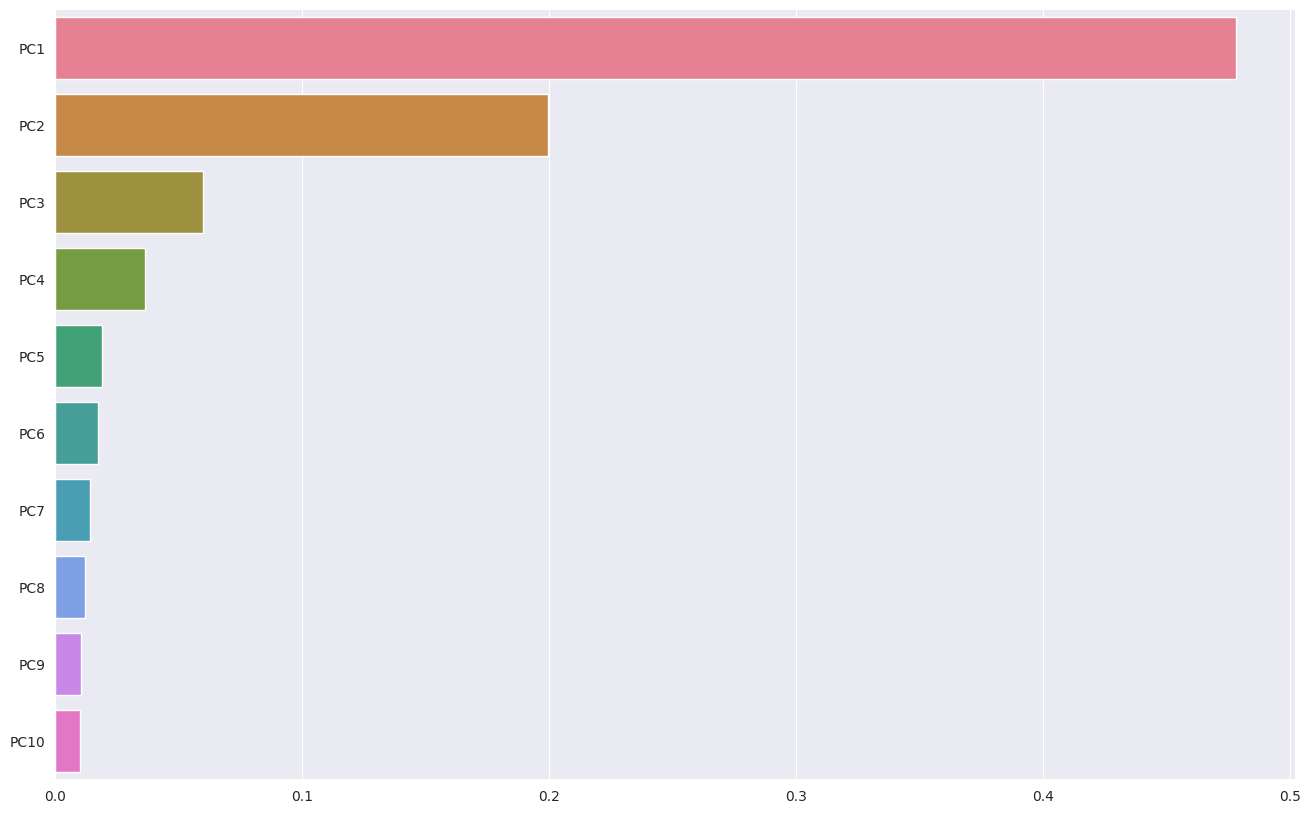

In [34]:
plt.figure(figsize=(16,10))
sns.barplot(x=pca.explained_variance_ratio_, y = ['PC' + str(i+1) for i in range(n_components)], orient='h', palette='husl')
plt.show()

### Training (With Dimensionality Reduction)

In [35]:
reduced_model = LogisticRegression()
reduced_model.fit(X_train_reduced, y_train)

print("Test Accuracy: {:.4f}%".format(reduced_model.score(X_test_reduced, y_test) * 100))

Test Accuracy: 97.9375%


In [36]:
X_train.memory_usage().sum(), X_test.memory_usage().sum()

(81600128, 21760128)

In [38]:
print("Ratio of memory usage (original to reduced): ", X_train.memory_usage().sum()/ X_train_reduced.memory_usage().sum())

Ratio of memory usage (original to reduced):  16.999573344710807
